In [1]:
import io
import pandas as pd

In [2]:
from google.colab import files
uploaded01 = files.upload()

Saving apple_no_date.csv to apple_no_date.csv


In [3]:
df01 = pd.read_csv(io.BytesIO(uploaded01['apple_no_date.csv']))
df01

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647
5,155.25,155.54,154.40,154.99,21250798
6,155.19,155.19,146.02,148.98,64882657
7,145.74,146.09,142.51,145.42,72307330
8,147.16,147.45,145.15,146.59,34165445
9,147.50,147.50,143.84,145.16,31531232


In [4]:
rng = pd.date_range(start="6/1/2017",end="6/30/2017",freq='B')
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [5]:
df01.set_index(rng, inplace=True)
df01.head()

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647


Finding missing dates from datetimeindex

In [8]:
daily_index = pd.date_range(start="6/1/2017",end="6/30/2017",freq='D')
daily_index

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04',
               '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='D')

In [9]:
daily_index.difference(df01.index)

DatetimeIndex(['2017-06-03', '2017-06-04', '2017-06-10', '2017-06-11',
               '2017-06-17', '2017-06-18', '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', freq=None)

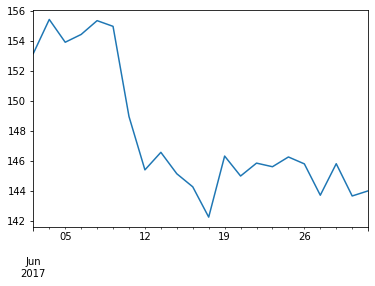

In [11]:
%matplotlib inline
df01.Close.plot()

In [12]:
df01["2017-06-01":"2017-06-10"].Close.mean()

153.7642857142857

In [14]:
df01.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [15]:
df01.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-11,155.19,155.19,146.02,148.98,64882657
2017-06-18,143.78,144.50,142.20,142.27,50361093
2017-06-25,145.13,147.16,145.11,146.28,35439389


In [16]:
df01.asfreq('H',method='pad')

,Open,High,Low,Close,Volume
2017-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
...,...,...,...,...,...
2017-06-29 20:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 21:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 22:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 23:00:00,144.71,145.13,142.28,143.68,31499368


In [21]:
rng02 = pd.date_range(start="1/1/2017", periods=72,freq="B")
rng02

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

In [23]:
import numpy as np
ts = pd.Series(np.random.randint(1,10,len(rng02)), index = rng02)
ts.head()

2017-01-02    4
2017-01-03    2
2017-01-04    6
2017-01-05    8
2017-01-06    7
Freq: B, dtype: int64